In [2]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing the train and test files into Data Frames.
train_file = pd.read_csv("train.tsv", sep="\t")
test_file = pd.read_csv("test.tsv", sep="\t")

Text(0,0.5,'Number of samples')

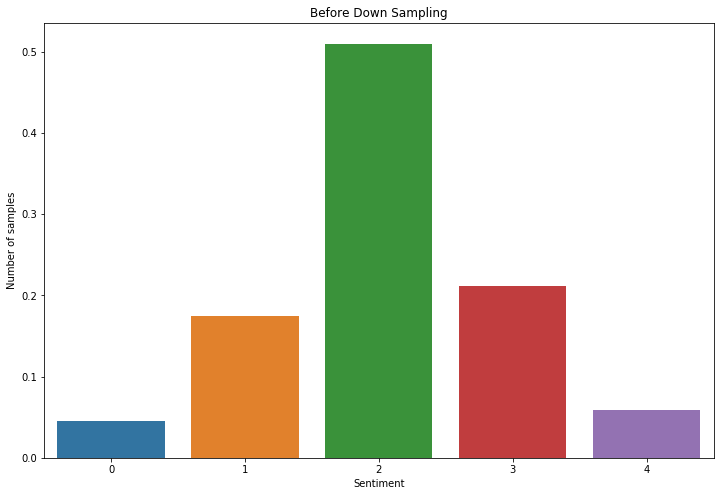

In [4]:
#Checking for imbalance of Labels
plot_imbal_labels = train_file.groupby(["Sentiment"]).size()
plot_imbal_labels = plot_imbal_labels / plot_imbal_labels.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(plot_imbal_labels.keys(), plot_imbal_labels.values).set_title("Before Down Sampling")
ax.set_ylabel('Number of samples')

Text(0,0.5,'Number of samples')

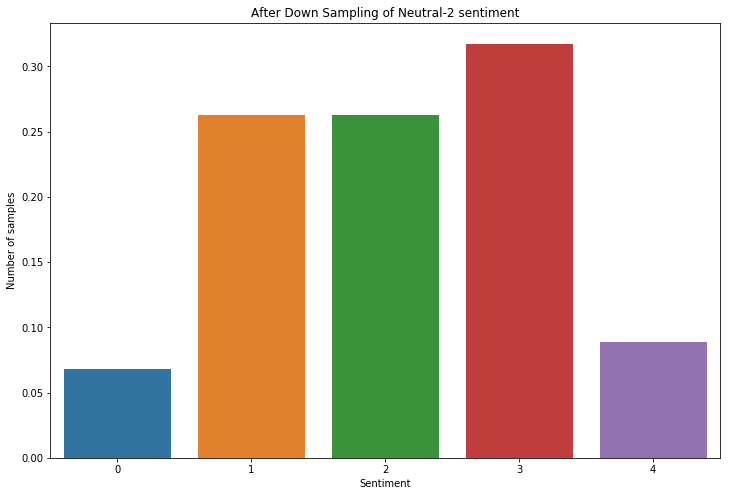

In [5]:
"""
First step is balancing the imbalanced data the histogram gives the information
about the different sentiments. As we can see the data is imbalanced with neutral data 
being more in our dataset compared to other it is taking almost 25 percent of the whole data.
So here we are 

"""

# Separate majority and minority classes
train_majority = train_file[train_file.Sentiment==2]
train_minority = train_file[train_file.Sentiment!=2]


# Downsample majority class

train_majority_downsampled = resample(train_majority, replace=False, n_samples=27273, random_state=123) 

## Combine minority class with downsampled majority class
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
plot_train_downsampled = train_downsampled.groupby(["Sentiment"]).size()
plot_train_downsampled  = plot_train_downsampled  / plot_train_downsampled.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(plot_train_downsampled.keys(), plot_train_downsampled.values).set_title("After Down Sampling of Neutral-2 sentiment")
ax.set_ylabel('Number of samples')

In [6]:
"""
Exploratory Data Analysis Before Cleaning the data:

Citation:
https://www.kaggle.com/artgor/movie-review-sentiment-analysis-eda-and-models
"""

import numpy as np
from nltk.util import ngrams
from collections import Counter
print("The average count of phrases per sentence in the given train set is:")
print(train_file.groupby('SentenceId')['Phrase'].count().mean())

print("The number of phrases in train:",train_file.shape[0])
print("The number of sentences in train:",len(train_file.SentenceId.unique()))

print('Average word length of phrases in train is:',np.mean(train_file['Phrase'].apply(lambda x: len(x.split()))))


def MostCommon(sentiment, no):
    text = ' '.join(train_file.loc[train_file.Sentiment == sentiment, 'Phrase'].values)
    text_unigrams = [i for i in ngrams(text.split(), 1)]
    text_bigrams = [i for i in ngrams(text.split(), 2)]
    text_trigrams = [i for i in ngrams(text.split(), 3)]
    print("The 30 most common words in sentiment",sentiment,"\n", Counter(text_unigrams).most_common(no))
    print("The 30 most common bigrams in sentiment", sentiment,"\n",Counter(text_bigrams).most_common(no))
    print("The 30 most common trigrams in sentiment",sentiment, "\n",Counter(text_trigrams).most_common(no))

    
    
#Taking into consideration all the sentiments:
for i in [0,1,2,3,4]:
    MostCommon(i,30)
    


"""
As can be seen there is a lot of commas and fullstops which are giving the false sentiment 
So cleaning the data further and then applying the EDA,

"""

The average count of phrases per sentence in the given train set is:
18.297572986282095
The number of phrases in train: 156060
The number of sentences in train: 8529
Average word length of phrases in train is: 7.193451236703832
The 30 most common words in sentiment 0 
 [((',',), 3714), (('the',), 3067), (('a',), 2570), (('and',), 2503), (('of',), 2236), (('.',), 1973), (('to',), 1876), (('is',), 1361), (("'s",), 1136), (('that',), 1130), (('in',), 997), (('it',), 926), (('movie',), 755), (('as',), 736), (('this',), 575), (('for',), 509), (('its',), 488), (('film',), 477), (('with',), 437), (("n't",), 424), (('you',), 418), (('bad',), 416), (('an',), 406), (('--',), 377), (('or',), 377), (('be',), 369), (('so',), 366), (('The',), 345), (('by',), 334), (('like',), 311)]
The 30 most common bigrams in sentiment 0 
 [(('of', 'the'), 385), ((',', 'and'), 343), (('.', 'is'), 218), (('of', 'a'), 190), (('in', 'the'), 190), (('it', "'s"), 177), (('is', 'a'), 159), (('the', 'film'), 154), (('a',

The 30 most common words in sentiment 4 
 [((',',), 4878), (('and',), 3962), (('the',), 3817), (('a',), 3306), (('of',), 3021), (('.',), 2280), (('is',), 1546), (('to',), 1539), (("'s",), 1329), (('that',), 1247), (('in',), 1043), (('film',), 930), (('with',), 910), (('it',), 738), (('as',), 712), (('an',), 662), (('movie',), 564), (('for',), 553), (('A',), 519), (('its',), 516), (('this',), 472), (('one',), 439), (('most',), 439), (('you',), 377), (('The',), 372), (('best',), 364), (('funny',), 341), (('--',), 325), (('has',), 314), (('on',), 314)]
The 30 most common bigrams in sentiment 4 
 [(('of', 'the'), 753), ((',', 'and'), 536), (('is', 'a'), 354), (('.', 'is'), 274), (('one', 'of'), 268), (('in', 'the'), 228), (('the', 'best'), 208), (('and', 'a'), 194), (('of', 'a'), 175), (('the', 'most'), 167), (('it', "'s"), 165), (('the', 'film'), 164), (('with', 'a'), 158), (('and', 'the'), 156), (('to', 'the'), 156), (('.', 'A'), 141), (("'s", 'a'), 137), ((',', 'but'), 136), (('funny', 

'\nAs can be seen there is a lot of commas and fullstops which are giving the false sentiment \nSo cleaning the data further and then applying the EDA,\n\n'

In [7]:
"""
Citation: Kaggle Discussion
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/discussion/49771
"""
#Data Cleaning of train set:
def preprocess(given_review):
    review = given_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [10]:
"""
Applying the preprocess function on the Phrase coloumn to clean the data
DO NOT RUN THIS CODE IT TAKES TIME
"""
train_downsampled['Cleaned_Phrase'] = train_downsampled["Phrase"].apply(lambda x :preprocess(x))
train_downsampled.to_csv("train_proj.tsv", sep='\t', index = False)
test_file['Cleaned_Phrase'] = test_file['Phrase'].apply(lambda x :preprocess(x))
test_file.to_csv("test_proj.tsv", sep='\t', index = False)

In [11]:
"""
DO NOT RUN THIS CODE IT TAKES TIME
The train file with 150K records
"""
train_file["Cleaned_Phrase"] = train_file["Phrase"].apply(lambda x :preprocess(x))
train_file.to_csv("train_p.tsv", sep='\t', index = False)

In [8]:
"""
150K records cleaned data

"""
train_150k = pd.read_csv("train_p.tsv", sep="\t")
print(train_150k.shape)

#Removing the Null values:
train_150k = train_150k.dropna()
print(train_150k.shape)

(156060, 5)
(154634, 5)


In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score

"""
This contains preprocessed data of downsampled data:

"""

train_downsamp_preproces = pd.read_csv("train_proj.tsv", sep="\t")

"""
542 rows null values, am droping them they are 1 percent out of 1 lakh records
"""

train_downsamp_preproces = train_downsamp_preproces.dropna()

In [10]:
"""
Exploratory Data Analysis after the preprocessing of the data:


"""

#Better plot graphs

def MostCommonPostEDA(sentiment, no):
    text = ' '.join(train_downsamp_preproces.loc[train_file.Sentiment == sentiment, 'Cleaned_Phrase'].values)
    text_unigrams = [i for i in ngrams(text.split(), 1)]
    text_bigrams = [i for i in ngrams(text.split(), 2)]
    text_trigrams = [i for i in ngrams(text.split(), 3)]
    print("The most common words in sentiment",sentiment,"\n", Counter(text_unigrams).most_common(no))
    print("The most common bigrams in sentiment",sentiment, "\n",Counter(text_bigrams).most_common(no))
    print("The most common trigrams in sentiment",sentiment, "\n",Counter(text_trigrams).most_common(no))


#All the common words, unigrams and bigrams in all the sentiments
for i in range(5):
    MostCommonPostEDA(i,30)

The most common words in sentiment 0 
 [(('movie',), 288), (('film',), 287), (('n',), 151), (('one',), 133), (('like',), 114), (('story',), 98), (('character',), 89), (('good',), 85), (('make',), 83), (('much',), 80), (('time',), 77), (('rrb',), 75), (('funny',), 75), (('comedy',), 72), (('lrb',), 69), (('well',), 69), (('best',), 64), (('director',), 63), (('even',), 63), (('work',), 63), (('life',), 62), (('way',), 59), (('never',), 56), (('love',), 55), (('get',), 53), (('little',), 53), (('made',), 52), (('new',), 51), (('feel',), 51), (('performance',), 51)]
The most common bigrams in sentiment 0 
 [(('ca', 'n'), 19), (('feel', 'like'), 17), (('african', 'american'), 14), (('romantic', 'comedy'), 13), (('wo', 'n'), 12), (('year', 'old'), 11), (('writer', 'director'), 10), (('soap', 'opera'), 9), (('hour', 'half'), 9), (('n', 'feel'), 9), (('like', 'film'), 9), (('passionate', 'truthful'), 9), (('subject', 'matter'), 8), (('new', 'york'), 8), (('play', 'like'), 8), (('american', 'b

#### Data Visualization using the Word Cloud

(-0.5, 799.5, 499.5, -0.5)

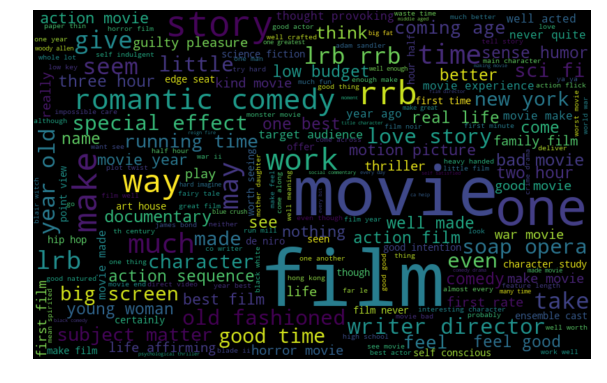

In [11]:
"""
Data Visualization in the form of Word Cloud:
Positive Negative Sentiments


Citation: Kaggle Discussion
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/discussion/49771

"""

all_words = ' '.join([text for text in train_downsamp_preproces['Cleaned_Phrase']])
positive_words = ' '.join(train_downsamp_preproces.loc[train_downsamp_preproces.Sentiment == 4, 'Cleaned_Phrase'].values)
negative_words = ' '.join(train_downsamp_preproces.loc[train_downsamp_preproces.Sentiment == 1, 'Cleaned_Phrase'].values)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

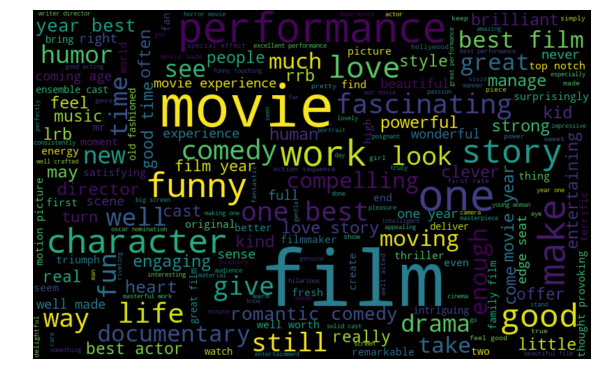

In [12]:
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')


(-0.5, 799.5, 499.5, -0.5)

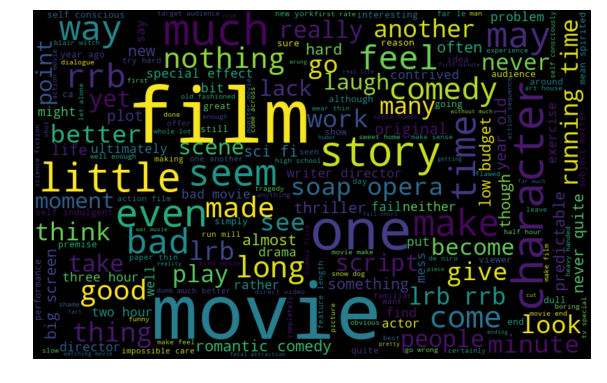

In [12]:
neg_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis('off')

In [13]:
"""
To apply the baseline models, first we are splitting the data into train and validation sets in 80:20 ratio. 

"""
#Splitting into train and test sets for the downsampled data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_downsamp_preproces['Cleaned_Phrase'],train_downsamp_preproces['Sentiment'], test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X_train_down = X_train.copy()
y_train_down = y_train.copy()
X_test_down = X_test.copy()
y_test_down = y_test.copy()


#Splitting into train and test sets for the Normal Data:
from sklearn.model_selection import train_test_split
X__train, X__test, y__train, y__test = train_test_split(train_150k['Cleaned_Phrase'],train_150k['Sentiment'], test_size=0.2)
print (X__train.shape, y__train.shape)
print (X__test.shape, y__test.shape)

X_train_150k = X__train.copy()
y_train_150k = y__train.copy()
X_test_150k = X__test.copy()
y_test_150k = y__test.copy()

(82567,) (82567,)
(20642,) (20642,)
(123707,) (123707,)
(30927,) (30927,)


#### Feature Extraction and Application of Baseline Models

In [163]:
"""
Feature Extraction 1: DownSampled Data
First we are implementing the Bag of Words feature selection using the 
CountVectorizer. And then applying the following Baseline Models:
1) Logistic Regression
2) KNN
3) Naive Bayes
4) SVM

"""
log_acc=[]
svn_acc=[]
knn_acc=[]
naive_acc=[]

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10)
X_train_bow = cv.fit_transform(X_train_down).toarray()
X_test_bow = cv.fit_transform(X_test_down).toarray()



#Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
classifier_mulnb = MultinomialNB()
classifier_mulnb.fit(X_train_bow, y_train_down )
y_test_pred_nulnb = classifier_mulnb.predict(X_test_bow)
mulnb_score = accuracy_score(y_test_down,y_test_pred_nulnb)
print("Multinomial Naive Bayes score", mulnb_score)
naive_acc.append(mulnb_score)


#Logistic Regression,
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1', C=0.5)
log_reg.fit(X_train_bow,  y_train_down)
y_test_pred_logreg = log_reg.predict(X_test_bow)
log_reg_score = accuracy_score(y_test_down,y_test_pred_logreg)
print("Logististic Regression score", log_reg_score)
log_acc.append(log_reg_score)

#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_bow,  y_train_down)
y_test_predicted = neigh.predict(X_test_bow)
score_test_knn = metrics.accuracy_score(y_test_down, y_test_predicted)
print("KNN score",score_test_knn)
knn_acc.append(score_test_knn)
#SVM
from sklearn.svm import LinearSVC
clf_svm = LinearSVC(random_state=0, tol=1e-5)
clf_svm.fit(X_train_bow,  y_train_down)
y_test_predicted_svm = clf_svm.predict(X_test_bow)
score_test_svm = metrics.accuracy_score(y_test_down, y_test_predicted_svm)
print("Linear SVM score",score_test_svm)
svn_acc.append(score_test_svm)

Multinomial Naive Bayes score 0.316878209475826
Logististic Regression score 0.31838000193779675
KNN score 0.28519523302005617
Linear SVM score 0.31838000193779675


In [164]:
"""
Feature Extraction 1: Whole Data
First we are implementing the Bag of Words feature selection using the 
CountVectorizer. And then applying the following Baseline Models:
1) Logistic Regression
2) KNN
3) Naive Bayes
4) SVM

"""

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10)
X_train_bow_150k = cv.fit_transform(X_train_150k).toarray()
X_test_bow_150k = cv.fit_transform(X_test_150k).toarray()



#Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
classifier_mulnb = MultinomialNB()
classifier_mulnb.fit(X_train_bow_150k, y_train_150k )
y_test_pred_nulnb = classifier_mulnb.predict(X_test_bow_150k)
mulnb_score = accuracy_score(y_test_150k,y_test_pred_nulnb)
print("Multinomial Naive Bayes score", mulnb_score)
naive_acc.append(mulnb_score)


#Logistic Regression,
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1', C=0.5)
log_reg.fit(X_train_bow_150k, y_train_150k)
y_test_pred_logreg = log_reg.predict(X_test_bow_150k)
log_reg_score = accuracy_score(y_test_150k,y_test_pred_logreg)
print("Logististic Regression score", log_reg_score)
log_acc.append(log_reg_score)

#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_bow_150k, y_train_150k)
y_test_predicted = neigh.predict(X_test_bow_150k)
score_test_knn = metrics.accuracy_score(y_test_150k, y_test_predicted)
print("KNN score",score_test_knn)
knn_acc.append(score_test_knn)
#SVM
from sklearn.svm import LinearSVC
clf_svm = LinearSVC(random_state=0, tol=1e-5)
clf_svm.fit(X_train_bow_150k, y_train_150k)
y_test_predicted_svm = clf_svm.predict(X_test_bow_150k)
score_test_svm = metrics.accuracy_score(y_test_150k, y_test_predicted_svm)
print("Linear SVM score",score_test_svm)
svn_acc.append(score_test_svm)

Multinomial Naive Bayes score 0.5092637501212532
Logististic Regression score 0.510395447343745
KNN score 0.4963300675784913
Linear SVM score 0.510395447343745


In [156]:
"""

Feature Extraction 2
TF-IDF Term Frequency - Inverse Document Frequency
Here we have used the max_features = 10, other-wise the code may get memory error.
"""


#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.5, min_df=3, max_features= 10, stop_words='english')

# TF-IDF feature matrix
X_train_tfidf = tfidf.fit_transform(X_train_down)
print("Features for downsampled data","\n",tfidf.get_feature_names())
X_train_tfidf_150k = tfidf.fit_transform(X_train_150k)
print("Features for whole data","\n",tfidf.get_feature_names())

Features for downsampled data 
 ['character', 'comedy', 'film', 'good', 'like', 'make', 'movie', 'rrb', 'story', 'time']
Features for whole data 
 ['character', 'film', 'good', 'life', 'like', 'make', 'movie', 'rrb', 'story', 'time']


In [155]:
"""
Feature Extraction - 3
N-Grams:
When we start using the bigrams model, by setting the ngram_range and trying to know the features,
we were getting a memory error, so we commented out the code.'
As the number of features we are getting is 76682, we have not tried the N-grams model.

"""

from sklearn.feature_extraction.text import TfidfVectorizer
ngrams_tfidf = TfidfVectorizer(min_df = 1, max_df = 0.5, ngram_range = (1,2))
all_words = [text for text in train_downsamp_preproces['Cleaned_Phrase']]
features = ngrams_tfidf.fit_transform(all_words)
print("N-grams features",len(ngrams_tfidf.get_feature_names()))
#ft = pd.DataFrame(features.todense(), columns  = ngrams_tfidf.get_feature_names())


N-grams features 76682


### Pipeline TF-IDF and Hyper Parameter Tuning

In [112]:
"""
TFIDF - Logistic Regression Pipeline
Here we are increasing the number of features in list "ran" and 
tuning the model, and calculating the accuracies. And printing out
the confusion matrices.

"""
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
ran = [1000,2000,10000,20000,50000,60000,66292]
trainscores_log = []
validationscores_log = []
cnf_log = []
best_out_log=[]
best_acc_log=0

for x in ran:
    
    log_reg_classifier = LogisticRegression(penalty='l2', C=0.5)


    tfidf = TfidfVectorizer(
        input='content',
        encoding='utf-8',
        decode_error='strict',
        strip_accents=None,
        lowercase=True,
        preprocessor=None,
        tokenizer=None,
        stop_words=None,
        ngram_range=(1, 2),
        analyzer='word',
        max_df=1.0,
        min_df=1,
        max_features= x,
        vocabulary=None,
        binary=False,
    )

    pipeline_logreg = Pipeline([
        ('tfidf', tfidf),
        ('Logistic Regression', log_reg_classifier) 
    ])

    pipeline_logreg.fit(X_train_150k, y_train_150k)
    train_score_logreg = pipeline_logreg.score(X_train_150k, y_train_150k)
    test_score_logreg = pipeline_logreg.score(X_test_150k, y_test_150k)
    print("Train Score for Logistic Regression for number of features",x,":",train_score_logreg)
    print("Test Score for Logistic Regression for number of features",x,":",test_score_logreg)
    trainscores_log.append(train_score_logreg)
    validationscores_log.append(test_score_logreg)
    y_pred_tfidf_logreg = pipeline_logreg.predict(X_test_150k)
    

    #Evaluation Using the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cnf_matrix = confusion_matrix(y_test_150k, y_pred_tfidf_logreg)
    np.set_printoptions(precision=2)
    print(cnf_matrix)
    cnf_log.append(cnf_matrix)
    if best_acc_log<test_score_logreg:
        best_out_log=y_pred_tfidf_logreg
        best_acc_log=test_score_logreg

Train Score for Logistic Regression for number of features 1000 : 0.5820123355994407
Test Score for Logistic Regression for number of features 1000 : 0.5767452387881139
[[  118   452   790    85     7]
 [   73   985  3898   439     8]
 [   28   506 14238   912    18]
 [    3   166  3949  2302   123]
 [    1    45   662   925   194]]
Train Score for Logistic Regression for number of features 2000 : 0.6025043045260171
Test Score for Logistic Regression for number of features 2000 : 0.5940117049827012
[[  133   557   681    77     4]
 [   88  1262  3677   367     9]
 [   28   529 14262   865    18]
 [    2   160  3754  2483   144]
 [    0    42   553  1001   231]]
Train Score for Logistic Regression for number of features 10000 : 0.6304574518822702
Test Score for Logistic Regression for number of features 10000 : 0.6074627348271736
[[  156   627   606    60     3]
 [   81  1371  3701   246     4]
 [   23   503 14363   794    19]
 [    1    99  3683  2611   149]
 [    0    16   465  1060  

In [104]:
"""
TF-IDF - Multinomial Naive Bayes pipeline 
Here we are increasing the number of features in list "ran" and 
tuning the model, and calculating the accuracies. And printing out
the confusion matrices.

"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

ran = [1000,2000,10000,20000,50000,60000,66292]
trainscores_naive = []
validationscores_naive = []
cnf_naive = []
cnf_log = []
best_out_naive = []
best_acc_naive = 0
for x in ran: 

    classifier_mulb = MultinomialNB()

    tfidf = TfidfVectorizer(
        input='content',
        encoding='utf-8',
        decode_error='strict',
        strip_accents=None,
        lowercase=True,
        preprocessor=None,
        tokenizer=None,
        stop_words=None,
        ngram_range=(1, 2),
        analyzer='word',
        max_df=1.0,
        min_df=1,
        max_features= x,
        vocabulary=None,
        binary=False,
    )


    pipeline_mulnb = Pipeline([
        ('tfidf', tfidf),
        ('Multinomial Naive Bayes', classifier_mulb) 
    ])



    pipeline_mulnb.fit(X_train_150k, y_train_150k)
    train_score_mulnb = pipeline_mulnb.score(X_train_150k, y_train_150k)
    test_score_mulnb = pipeline_mulnb.score(X_test_150k, y_test_150k)
    print("Train Score for Naive Bayes for number of features",x,":",train_score_mulnb)
    print("Test Score for Naive Bayes for number of features",x,":",test_score_mulnb)
    trainscores_naive.append(train_score_mulnb)
    validationscores_naive.append(test_score_mulnb)
    y_pred_tfidf_mulnb = pipeline_mulnb.predict(X_test_150k)


    #Evaluation Using the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cnf_matrix = confusion_matrix(y_test_150k, y_pred_tfidf_mulnb)
    np.set_printoptions(precision=2)
    print(cnf_matrix)
    cnf_naive.append(cnf_matrix)
    if best_acc_naive<test_score_mulnb:
        best_out_naive=y_pred_tfidf_mulnb
        best_acc_naive=test_score_mulnb

Train Score for Naive Bayes for number of features 1000 : 0.551989782308196
Test Score for Naive Bayes for number of features 1000 : 0.5505221974326641
[[   39   247  1123    40     3]
 [   17   441  4774   168     3]
 [    2   186 15057   455     2]
 [    0    42  5038  1435    28]
 [    0     9  1090   674    54]]
Train Score for Naive Bayes for number of features 2000 : 0.5710267001867315
Test Score for Naive Bayes for number of features 2000 : 0.56445824037249
[[   58   388   972    33     1]
 [   22   722  4499   157     3]
 [    7   299 14834   557     5]
 [    0    52  4712  1738    41]
 [    0     9   888   825   105]]
Train Score for Naive Bayes for number of features 10000 : 0.6209268675176021
Test Score for Naive Bayes for number of features 10000 : 0.5918129789504316
[[  115   596   703    37     1]
 [   51  1279  3906   164     3]
 [   14   545 14263   871     9]
 [    0    77  3939  2447    80]
 [    1    11   601  1015   199]]
Train Score for Naive Bayes for number of fe

In [107]:
"""
Pipeline Model using the following:
Feature Extraction - TF-IDF
Linear Support Vector Classifier
Here we are increasing the number of features in list "ran" and 
tuning the model, and calculating the accuracies. And printing out
the confusion matrices.
Citation:
https://www.kaggle.com/ynouri/rotten-tomatoes-sentiment-analysis
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
import numpy as np
#Max_features parameter tuning on the Linear SVC Classifier Model:
ran = [1000,2000,10000,20000,50000,60000,66292]
trainscores_svc = []
validationscores_svc = []
cnf_svc = []
best_out_svc = []
best_acc_svc = 0
for x in ran: 

    svc = LinearSVC(
        C=1.0,
        class_weight='balanced',
        dual=False,
        fit_intercept=True,
        intercept_scaling=1,
        loss='squared_hinge',
        max_iter=1000,
        multi_class='ovr',
        penalty='l2',
        random_state=0,
        tol=1e-05, 
        verbose=0
    )

    tfidf = TfidfVectorizer(
        input='content',
        encoding='utf-8',
        decode_error='strict',
        strip_accents=None,
        lowercase=True,
        preprocessor=None,
        tokenizer=None,
        stop_words=None,
        ngram_range=(1, 2),
        analyzer='word',
        max_df=1.0,
        min_df=1,
        max_features= x,
        vocabulary=None,
        binary=False,
    )

    pipeline_svc = Pipeline([
        ('tfidf', tfidf),
        ('svc', svc)    ])



    pipeline_svc.fit(X_train_150k, y_train_150k)
    train_score_svc = pipeline_svc.score(X_train_150k, y_train_150k)
    test_score_svc = pipeline_svc.score(X_test_150k, y_test_150k)
    print("Train Score for svc for number of features",x,":",train_score_svc)
    print("Test Score for svc for number of features",x,":",test_score_svc)
    trainscores_svc.append(train_score_svc)
    validationscores_svc.append(test_score_svc)
    y_pred_tfidf_svm = pipeline_svc.predict(X_test_150k)


    #Evaluation Using the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cnf_matrix = confusion_matrix(y_test_150k, y_pred_tfidf_svm)
    np.set_printoptions(precision=2)
    print(cnf_matrix)
    cnf_svc.append(cnf_matrix)
    if best_acc_svc<test_score_svc:
        best_out_svc=y_pred_tfidf_svm
        best_acc_svc=test_score_svc

Train Score for svc for number of features 1000 : 0.5384173894767474
Test Score for svc for number of features 1000 : 0.5262715426649853
[[  594   312   383    77    86]
 [  884  1357  2388   484   290]
 [  836  1407 11322  1445   692]
 [  253   436  2451  2089  1314]
 [   67    68   311   467   914]]
Train Score for svc for number of features 2000 : 0.5813656462447557
Test Score for svc for number of features 2000 : 0.5554046625925567
[[  679   379   284    67    43]
 [  999  1636  2109   448   211]
 [  689  1493 11490  1490   540]
 [  201   366  2265  2369  1342]
 [   42    42   206   534  1003]]
Train Score for svc for number of features 10000 : 0.6789591534836347
Test Score for svc for number of features 10000 : 0.603291622207133
[[  784   474   137    45    12]
 [  984  2316  1723   308    72]
 [  461  1736 11455  1729   321]
 [   95   286  1903  3031  1228]
 [   18    23    99   615  1072]]
Train Score for svc for number of features 20000 : 0.714801910967043
Test Score for svc fo

In [24]:
"""
Printing all the accuracies at one place.
"""
print(ran)
print(trainscores_log)
print(trainscores_naive)
print(trainscores_svc)
print(validationscores_log)
print(validationscores_naive)
print(validationscores_svc)

[1000, 2000, 10000, 20000, 50000, 60000, 66292]
[0.5820123355994407, 0.6025043045260171, 0.6304574518822702, 0.6360351475664271, 0.6420574421819298, 0.6423727032423387, 0.6420655257988634]
[0.551989782308196, 0.5710267001867315, 0.6209268675176021, 0.6403113809242807, 0.6840922502364458, 0.6916019303677238, 0.69336415885924]
[0.5384173894767474, 0.5813656462447557, 0.6789591534836347, 0.714801910967043, 0.7854123048816962, 0.802549572780845, 0.8111505411981537]
[0.5767452387881139, 0.5940117049827012, 0.6074627348271736, 0.6062340349856112, 0.6020952565719274, 0.5992498464125198, 0.5979888123646006]
[0.5505221974326641, 0.56445824037249, 0.5918129789504316, 0.597148122999321, 0.6102434765738675, 0.6146409286384066, 0.6135092314159148]
[0.5262715426649853, 0.5554046625925567, 0.603291622207133, 0.6110518317327901, 0.625020208878973, 0.6262489087205354, 0.6278979532447376]


In [165]:
log_acc.append(best_acc_log)
svn_acc.append(best_acc_svc)
naive_acc.append(best_acc_naive)

[0.316878209475826, 0.5092637501212532, 0.6146409286384066]
[0.31838000193779675, 0.510395447343745, 0.6278979532447376]


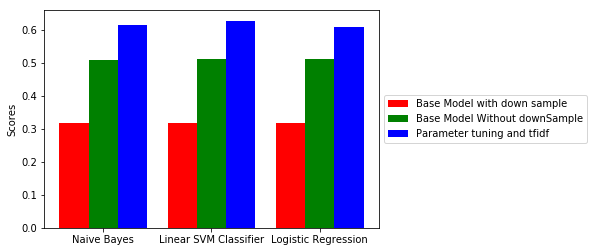

In [166]:
"""
Plotting the extended Bar plot of all the accuracies of different models on 
downsampled and whole data.

Citation:
https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
"""


import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  
width = 0.27       

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [naive_acc[0],svn_acc[0],log_acc[0]]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [naive_acc[1],svn_acc[1],log_acc[1]]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [naive_acc[2],svn_acc[2],log_acc[2]]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Naive Bayes', 'Linear SVM Classifier', 'Logistic Regression') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Base Model with down sample', 'Base Model Without downSample', 'Parameter tuning and tfidf'),loc='center left', bbox_to_anchor=(1, 0.5) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
       

    
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

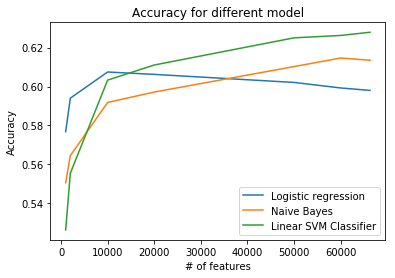

In [150]:
"""
Accuracies across different classifiers vs the features selected.
"""
import matplotlib.pyplot as plt 
  
plt.plot(ran, validationscores_log, label='Logistic regression') 
plt.plot(ran, validationscores_naive,label='Naive Bayes') 
plt.plot(ran, validationscores_svc,label='Linear SVM Classifier') 
plt.legend(loc='lower right')
 
plt.xlabel('# of features') 

plt.ylabel('Accuracy') 
 
plt.title('Accuracy for different model') 
  
plt.show()

In [170]:
"""
Evaluation Using the 5-Fold Cross Validation

"""
from sklearn.model_selection import cross_val_score
lis = [pipeline_logreg,pipeline_mulnb,pipeline_svc]
avg_scores = []
for l in lis:
    scores = cross_val_score(l,X_train_150k, y_train_150k, cv=5, scoring='f1_macro')
    avg_scores.append(np.mean(scores))
avg_scores

[0.3433037819519231, 0.3585152599136371, 0.5351266642835145]

In [181]:

"""
5 fold cross validation table
"""
d = {'Models': ['Logistic Regression','Naive Bayes','Linear SVC'], '5 Fold Cross Validation Scores': avg_scores}
df = pd.DataFrame(d)
df

,Models,5 Fold Cross Validation Scores
0,Logistic Regression,0.343304
1,Naive Bayes,0.358515
2,Linear SVC,0.535127


In [141]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools

"""

Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
"""

def plot_confusion_matrix(cm,
                          target_names=['0', '1', '2','3','4'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   


   

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Label')
    plt.show()

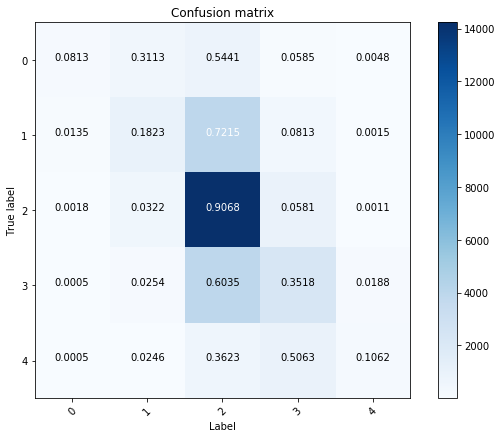

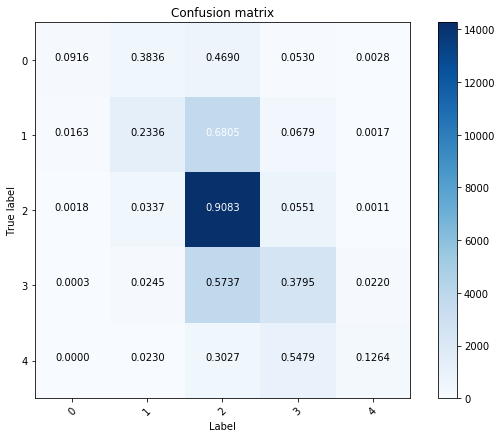

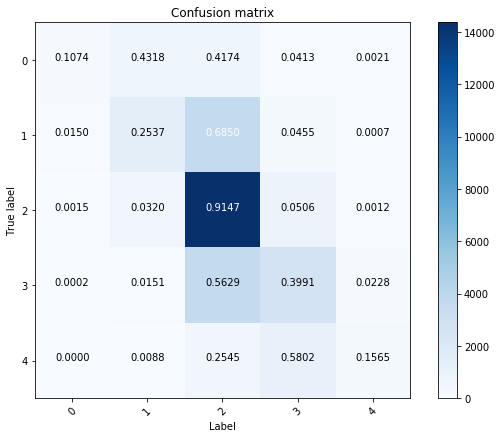

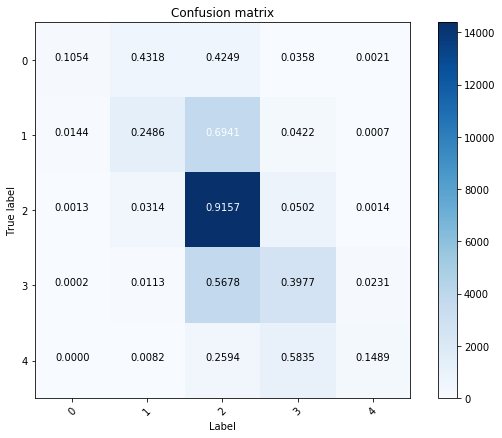

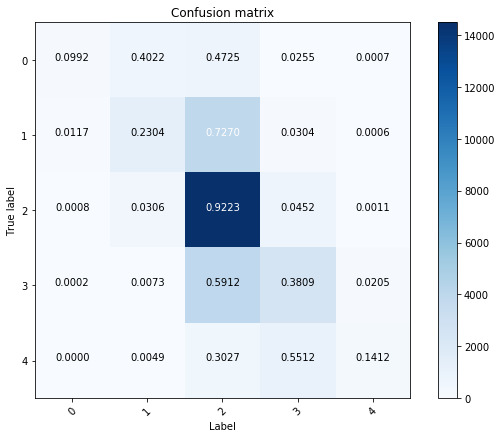

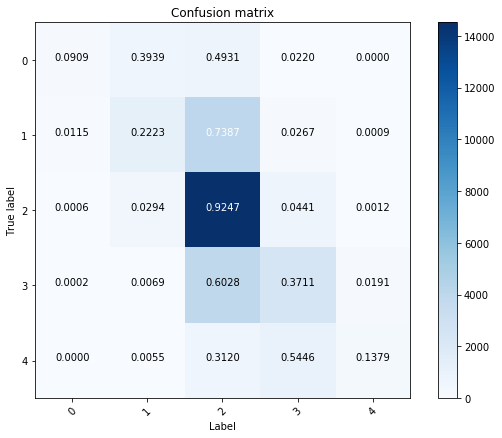

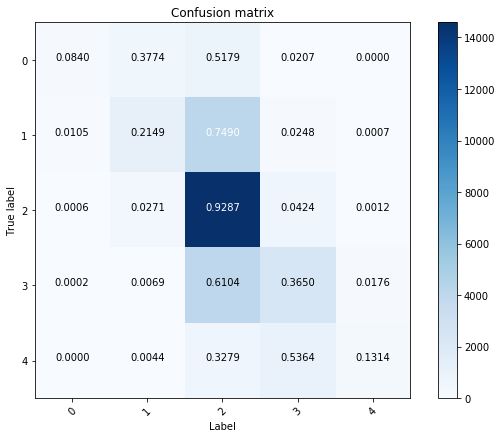

In [148]:
#Logistic Regression
for cnf_m in cnf_log:
    plot_confusion_matrix(cnf_m,['0', '1', '2','3','4'])

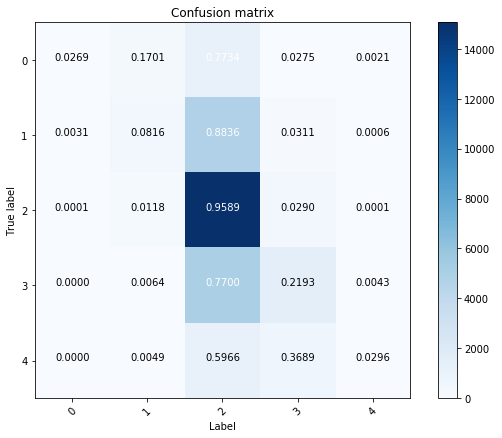

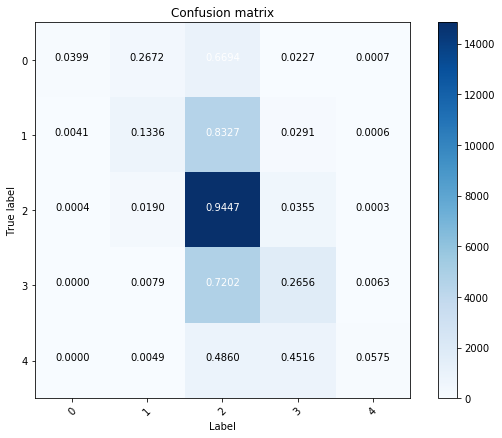

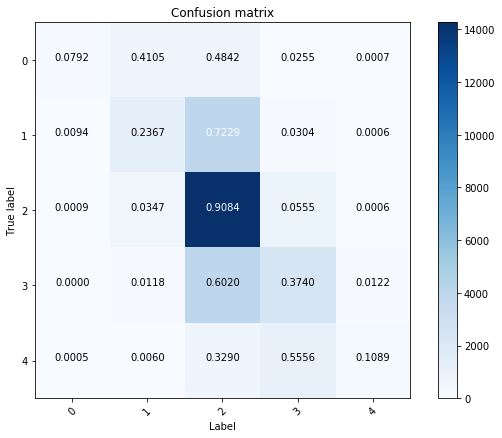

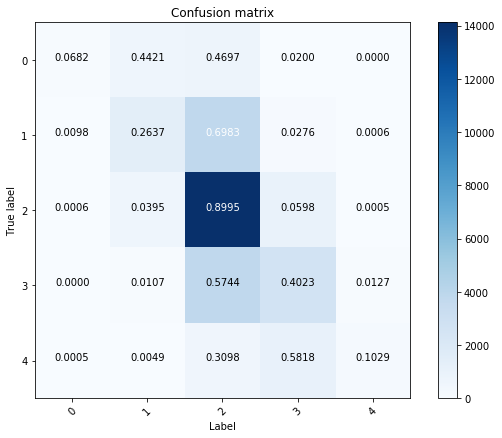

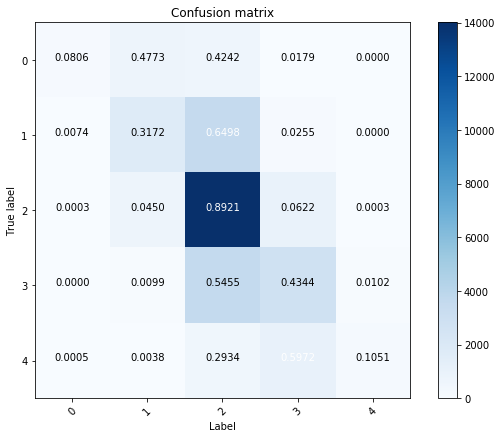

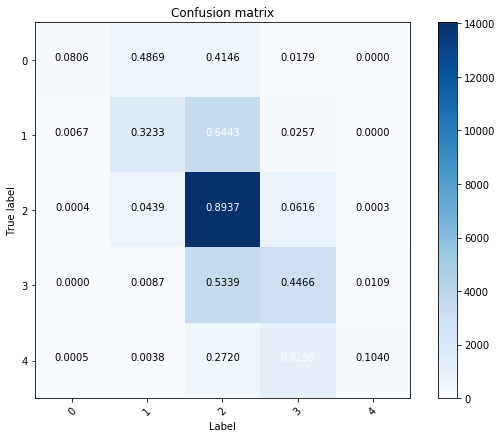

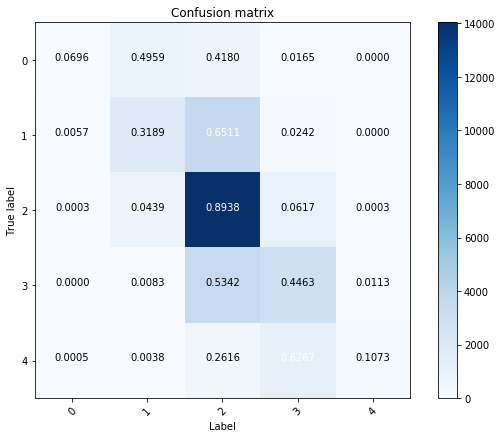

In [146]:
#Naive Bayes
for cnf_m in cnf_naive:
    plot_confusion_matrix(cnf_m,['0', '1', '2','3','4'])

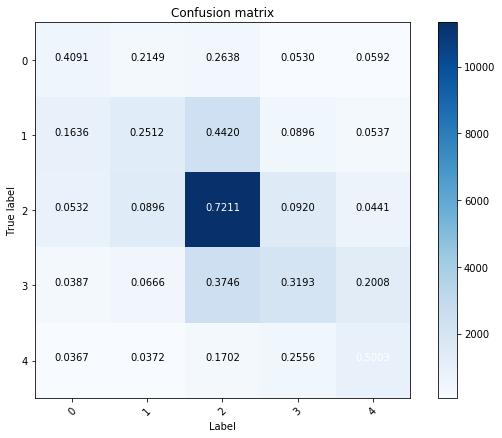

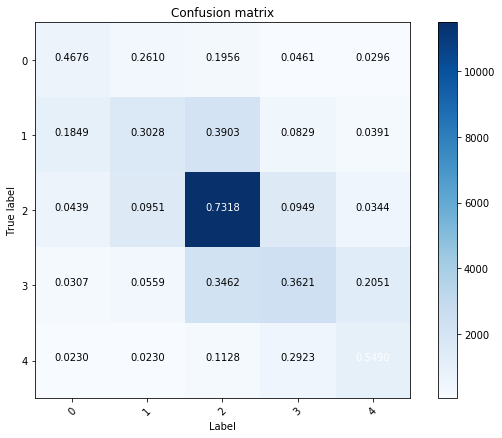

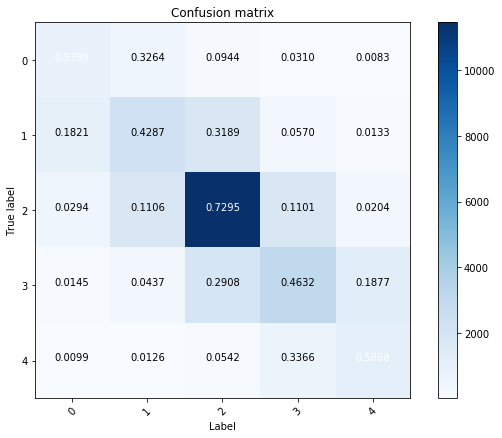

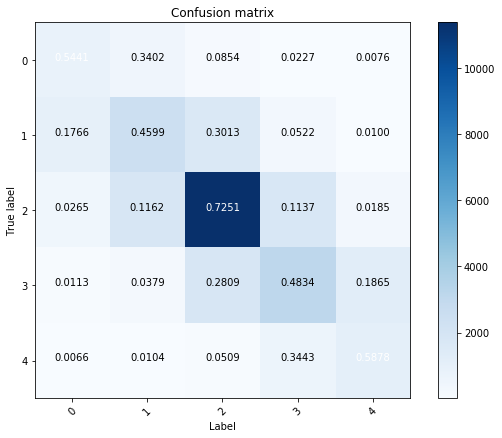

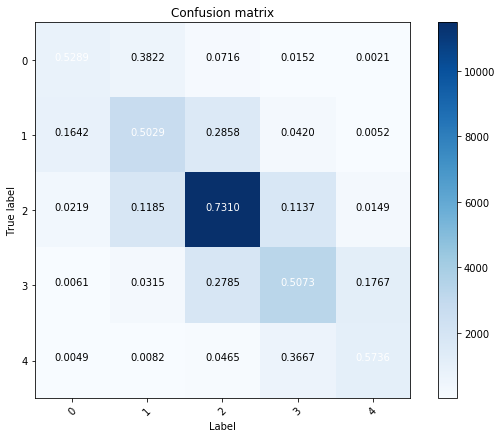

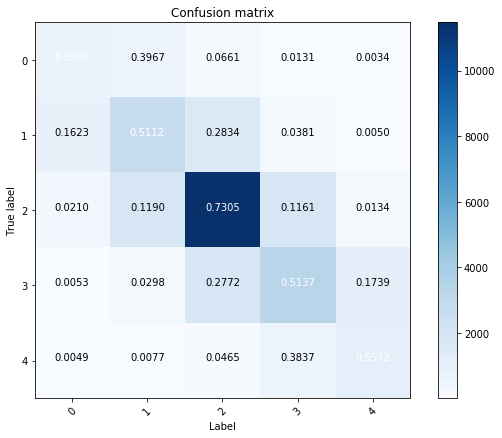

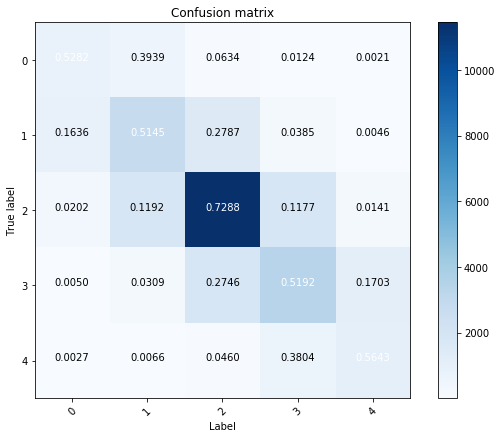

In [147]:
#SVC
for cnf_m in cnf_svc:
    plot_confusion_matrix(cnf_m,['0', '1', '2','3','4'])

In [182]:
"""
Need to define the final model
Train the whole data and then predict the final outputs
This model takes the X = Train set, y = Train Labels, and predicts the output for the given test file "Xt"

"""
def final_model(X,y,Xt):
    svc = LinearSVC(
        C=1.0,
        class_weight='balanced',
        dual=False,
        fit_intercept=True,
        intercept_scaling=1,
        loss='squared_hinge',
        max_iter=1000,
        multi_class='ovr',
        penalty='l2',
        random_state=0,
        tol=1e-05, 
        verbose=0
    )

    tfidf = TfidfVectorizer(
        input='content',
        encoding='utf-8',
        decode_error='strict',
        strip_accents=None,
        lowercase=True,
        preprocessor=None,
        tokenizer=None,
        stop_words=None,
        ngram_range=(1, 2),
        analyzer='word',
        max_df=1.0,
        min_df=1,
        max_features= 66292,
        vocabulary=None,
        binary=False,
    )

    pipeline_svc = Pipeline([
        ('tfidf', tfidf),
        ('svc', svc)])



    pipeline_svc.fit(X, y)
    

    train_score_svc = pipeline_svc.score(X, y)
    print("Train Score",train_score_svc)
    y_pr = pipeline_svc.predict(Xt)
    return y_pr


#Training on the whole data set and saving the predicted file in "output.csv"
numpy.savetxt("output.csv", final_model(train_150k['Cleaned_Phrase'], train_150k['Sentiment'],test_file['Phrase']), delimiter=",")


Train Score 0.7963125832611198


### The final test accuracy we got in the Kaggle submission is 0.60 